In [2]:
#%matplotlib inline
import numpy as np
import pandas as pd
import scipy.sparse
from sklearn import preprocessing
from sklearn.grid_search import ParameterGrid
import xgboost as xgb
import pickle
#import graphviz
import matplotlib.pyplot as plt
%matplotlib inline

Read in just the testing and training data.

In [47]:
error = pd.read_pickle('scripts/cv_results/actions_e20/search3/res1.p')
error2 = pd.read_pickle('scripts/cv_results/actions_e20/search3/res5.p')
error6 = pd.read_pickle('scripts/cv_results/actions_e20/search3/res6.p')
e = pd.read_pickle('scripts/cv_results/actions_e20/errors_search3.p')
param = pd.read_pickle('scripts/cv_results/actions_e20/params_search3.p')
#error['mean'] = error.apply(np.mean, axis = 1)
# error = error.astype(np.float64)
# error['mean'] = error.mean(1)
# error['std'] = error.std(1)

In [95]:
pd.read_pickle('scripts/cv_results/actionsXgb/errors_search1.p')

,test-error-mean,test-error-std,train-error-mean,train-error-std,num_boost_rounds
0,0.155700,0.002581,0.143643,0.000368,37
1,0.155588,0.002863,0.145197,0.000292,26
2,0.155685,0.002710,0.143231,0.000338,34
3,0.155793,0.002519,0.144968,0.000256,30
4,0.086707,0.001319,0.082278,0.000261,43
5,0.086943,0.001362,0.083326,0.000235,29
6,0.155711,0.002648,0.144495,0.000354,29
7,0.086943,0.001362,0.083326,0.000235,29


In [92]:
p = pd.read_pickle('scripts/cv_results/actionsXgb/params_search1.p')

In [93]:
p

,subsample,eta,colsample_bytree,max_depth
0,0.6,0.13,0.7,6
1,0.9,0.13,0.7,6
2,1.0,0.13,0.7,6
3,0.9,0.13,0.5,6
4,0.9,0.13,0.7,6
5,0.9,0.13,0.7,6
6,0.9,0.13,0.7,6


In [83]:
p.ix[5, 'details'] = 'dropped_p4'

In [65]:
x1 = e.loc[40:,e.columns.str.contains('valid.*mean')].iloc[:,-2]

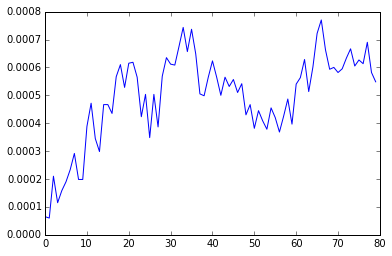

In [86]:
plt.plot(np.arange(len(x1)), (x1-x2))

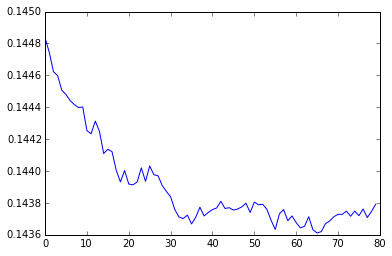

In [87]:
plt.plot(np.arange(len(x2)), x2)

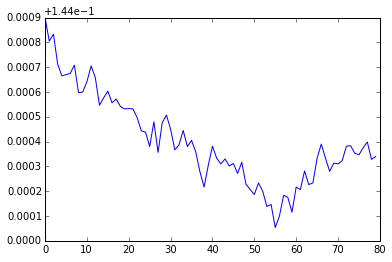

In [67]:
plt.plot(np.arange(len(x1)), x1)

In [3]:
#train_100 = pd.read_csv('Airbnb_data/train_users_2.csv', nrows = 100, index_col='id')
train_data = pd.read_csv('data/train_users_2.csv', index_col = 'id')
test_data = pd.read_csv('data/test_users.csv', index_col = 'id')
#sessions = pd.read_csv('../data/sessions.csv')
#age = pd.read_csv('Airbnb_data/age_gender_bkts.csv')
#countries = pd.read_csv('Airbnb_data/countries.csv')
all_df = pd.read_pickle('data/all_df.p')

In [5]:
error = pd.read_pickle('scripts/cv_results.p')
params = pd.read_pickle('scripts/cv_params.p')

In [6]:
res = pd.concat([error, params], axis = 1)

In [7]:
res.sort_values(by = 'test-error-mean', axis = 0);

In [6]:
with open('xgbmodels/sessions_e20_25n.p', 'rb') as f:
    bst = pickle.load(f)
features = sorted(bst.get_fscore().items(), key = lambda x: x[1], reverse = True)
[(feat, all_df.columns[int(feat[1:])], score) for feat, score in features]

NameError: name 'all_df' is not defined

In [ ]:
xgb.to_graphviz(bst, num_trees=11)

In [ ]:
submission = pd.DataFrame(np.column_stack([idx, cntr]), columns = ['id', 'country'])
submission.to_csv('submissions/datebin_model.csv', index=False)